In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def generate_bimodal_data(n_points=500, noise_std=0.1, seed=42):
    np.random.seed(seed)
    X = np.random.uniform(-4, 4, size=(n_points, 1))
    y = []

    for x in X:
        if np.random.rand() < 0.5:
            y_val = np.sin(x) + np.random.normal(0, noise_std)
        else:
            y_val = -np.sin(x) + np.random.normal(0, noise_std)
        y.append(y_val)

    y = np.array(y).reshape(-1, 1)
    return X, y


In [7]:
# Generate
X, y = generate_bimodal_data()
# Optional: Save as CSV
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})
df.to_csv("bimodal_regression_dataset.csv", index=False)
import os
print("Saved?" , os.path.exists("bimodal_regression_dataset.csv"))

Saved? True


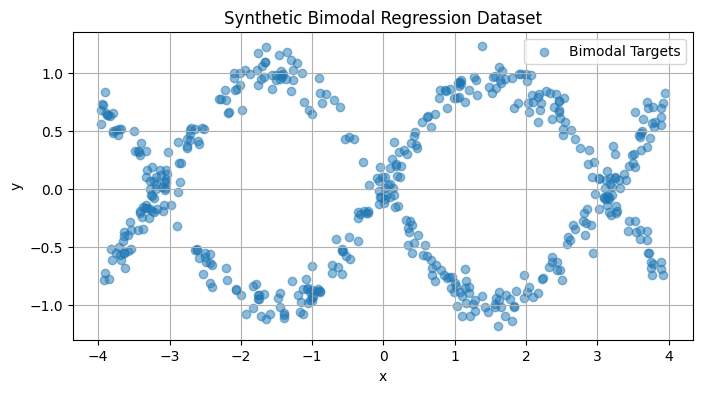

In [8]:
# Plot
plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.5, label="Bimodal Targets")
plt.title("Synthetic Bimodal Regression Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Branin Function (regression)
from skopt.benchmarks import branin
import numpy as np
import pandas as pd
import os

def generate_branin_csv(n_points=300, seed=42):
    np.random.seed(seed)
    X = np.random.uniform([-5, 0], [10, 15], size=(n_points, 2))
    y = np.array([branin(x) for x in X])
    
    df = pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        'y': y
    })
    
    os.makedirs("DataSets", exist_ok=True)
    path = os.path.join("DataSets", "branin_dataset.csv")
    df.to_csv(path, index=False)
    print("✅ Saved:", path)

generate_branin_csv()

✅ Saved: DataSets/branin_dataset.csv


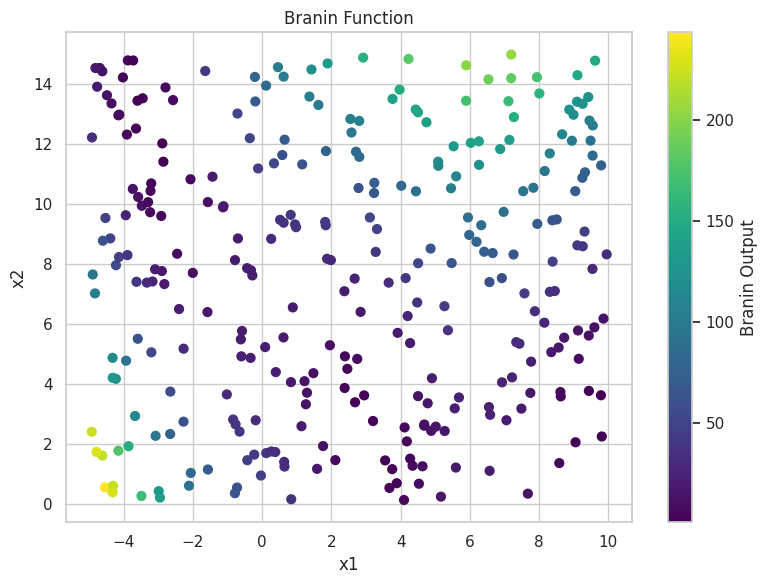

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
def plot_branin():
    path = os.path.join("DataSets", "branin_dataset.csv")
    df = pd.read_csv(path)
    
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(df["x1"], df["x2"], c=df["y"], cmap="viridis", s=40)
    plt.colorbar(sc, label="Branin Output")
    plt.title("Branin Function")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_branin()

In [14]:
# Mixture of Gaussians (regression)
from sklearn.preprocessing import StandardScaler

def generate_mixture_gaussians_csv(n_points=300, seed=42):
    np.random.seed(seed)
    half = n_points // 2

    x1 = np.random.normal(loc=-2, scale=0.5, size=(half, 2))
    y1 = x1[:, 0]**2 + np.sin(x1[:, 1]) + np.random.normal(0, 0.2, half)

    x2 = np.random.normal(loc=2, scale=0.5, size=(half, 2))
    y2 = -x2[:, 0]**2 + np.cos(x2[:, 1]) + np.random.normal(0, 0.2, half)

    X = np.vstack((x1, x2))
    y = np.concatenate((y1, y2))
    
    X_scaled = StandardScaler().fit_transform(X)

    df = pd.DataFrame({
        "x1": X_scaled[:, 0],
        "x2": X_scaled[:, 1],
        "y": y
    })

    os.makedirs("DataSets", exist_ok=True)
    path = os.path.join("DataSets", "mixture_gaussians_dataset.csv")
    df.to_csv(path, index=False)
    print("✅ Saved:", path)

generate_mixture_gaussians_csv()


✅ Saved: DataSets/mixture_gaussians_dataset.csv


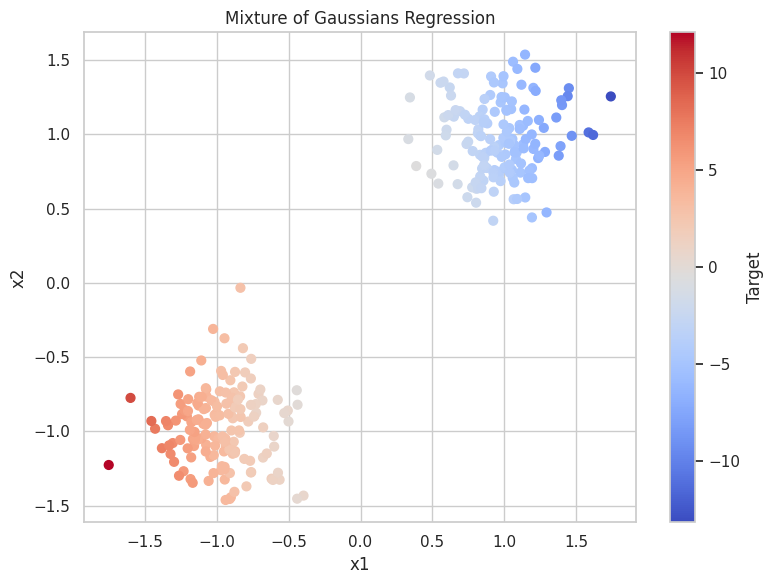

In [15]:
def plot_mixture():
    path = os.path.join("DataSets", "mixture_gaussians_dataset.csv")
    df = pd.read_csv(path)

    plt.figure(figsize=(8, 6))
    sc = plt.scatter(df["x1"], df["x2"], c=df["y"], cmap="coolwarm", s=40)
    plt.colorbar(sc, label="Target")
    plt.title("Mixture of Gaussians Regression")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_mixture()  

In [16]:
# XOR Classification Dataset
def generate_xor_dataset_csv(n_points=500, seed=42):
    np.random.seed(seed)
    X = np.random.randn(n_points, 2)
    y = ((X[:, 0] > 0) ^ (X[:, 1] > 0)).astype(int)

    X_scaled = StandardScaler().fit_transform(X)

    df = pd.DataFrame({
        "x1": X_scaled[:, 0],
        "x2": X_scaled[:, 1],
        "label": y
    })

    os.makedirs("DataSets", exist_ok=True)
    path = os.path.join("DataSets", "xor_classification_dataset.csv")
    df.to_csv(path, index=False)
    print("✅ Saved:", path)

generate_xor_dataset_csv()


✅ Saved: DataSets/xor_classification_dataset.csv


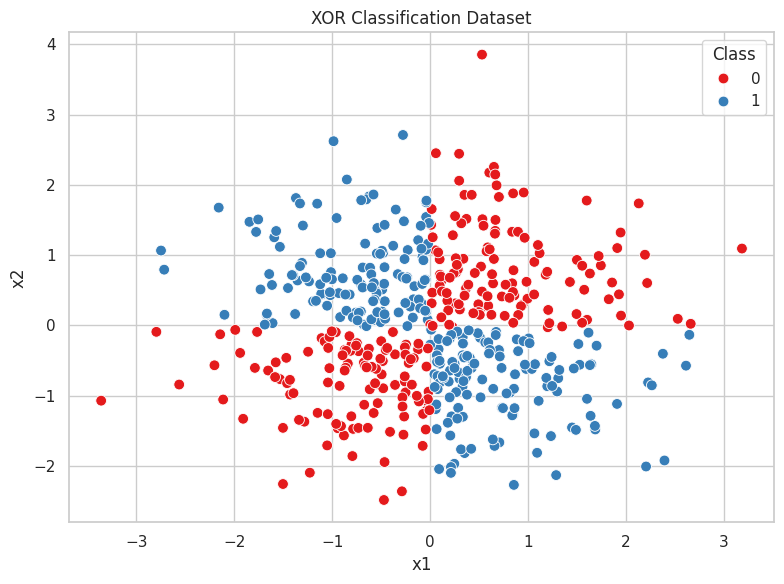

In [17]:
def plot_xor():
    path = os.path.join("DataSets", "xor_classification_dataset.csv")
    df = pd.read_csv(path)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="Set1", s=60)
    plt.title("XOR Classification Dataset")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend(title="Class")
    plt.tight_layout()
    plt.show()
plot_xor()

In [33]:
import pandas as pd
import os
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import difflib

from sklearn.datasets import fetch_openml

from sklearn.datasets import fetch_openml



def save_uci_dataset(name_or_id, target_name, filename=None):
    print(f"⏳ Loading dataset: {name_or_id}")
    
    if isinstance(name_or_id, int):
        data = fetch_openml(data_id=name_or_id, as_frame=True)
    else:
        data = fetch_openml(name=name_or_id, as_frame=True)
    
    df = data.frame
    print("🔍 Columns:", df.columns.tolist())
    print("🔍 Looking for:", target_name)
    data = fetch_openml(data_id=44087, as_frame=True)

    if target_name not in df.columns:
        closest = difflib.get_close_matches(target_name, df.columns, n=1)
        raise KeyError(f"❌ Target column '{target_name}' not found.\nClosest match: {closest}")

    features = df.drop(columns=[target_name])
    target = df[target_name]

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
    df_scaled[target_name] = target

    os.makedirs("DataSets/UCI", exist_ok=True)
    filename = filename or f"{name_or_id}_dataset.csv"
    path = os.path.join("DataSets/UCI", filename)
    df_scaled.to_csv(path, index=False)
    print(f"✅ Saved: {path}")





In [52]:
save_uci_dataset(531, target_name="MEDV", filename="boston_housing.csv")

save_uci_dataset(44087, target_name="Class", filename="concrete.csv")

save_uci_dataset(1472, target_name="y1", filename="energy.csv")

save_uci_dataset(187, target_name="class", filename="wine.csv")

save_uci_dataset(1017, target_name="binaryClass", filename="yacht.csv")

save_uci_dataset(44074, target_name="V15", filename="power.csv")



⏳ Loading dataset: 531
🔍 Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
🔍 Looking for: MEDV
✅ Saved: DataSets/UCI/boston_housing.csv
⏳ Loading dataset: 44087
🔍 Columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'Class']
🔍 Looking for: Class
✅ Saved: DataSets/UCI/concrete.csv
⏳ Loading dataset: 1472
🔍 Columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'y1', 'y2']
🔍 Looking for: y1
✅ Saved: DataSets/UCI/energy.csv
⏳ Loading dataset: 187
🔍 Columns: ['class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280%2FOD315_of_diluted_wines', 'Proline']
🔍 Looking for: class
✅ Saved: DataSets/UCI/wine.csv
⏳ Loading dataset: 1017
🔍 Columns: ['age', 'sex', 'height', 'weight', 'QRSduration', 'PRinterval', 'Q-Tinterval', 'Tinterval', 'Pinterval', 'QRS', 'T', 'P', 'QRST', 'J', 'heartrate', 'chDI_Qwave', 'chDI_Rwave', 'c